In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import gsw
import carbonate

%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 12

In [5]:
# Load GRL2016 data
SOG_TA = {}
data = np.loadtxt('/home/bmoorema/Desktop/grl2016.raw')
SOG_TA['crid'] = data[:, 0]
SOG_TA['stn'] = data[:, 3]
SOG_TA['mnth'] = data[:, 4]
SOG_TA['day'] = data[:, 5]
SOG_TA['lat'] = data[:, 6]
SOG_TA['lon'] = data[:, 7]
SOG_TA['P'] = data[:, 8]
SOG_TA['T'] = data[:, 9]
SOG_TA['S'] = data[:, 10]
SOG_TA['dic'] = data[:, 13]
SOG_TA['dic_qf'] = data[:, 14]
SOG_TA['alk'] = data[:, 15]
SOG_TA['alk_qf'] = data[:, 16]
SOG_TA['si'] = data[:, 19]
SOG_TA['si_qf'] = data[:, 20]
SOG_TA['po4'] = data[:, 21]
SOG_TA['po4_qf'] = data[:, 22]

SOG_TA['lon'][SOG_TA['lon'] > -100] = SOG_TA['lon'][SOG_TA['lon'] > -100] - 100

In [21]:
# Index
index = (
    (SOG_TA['stn'] > 2) & (SOG_TA['stn'] < 51) &
    ((SOG_TA['alk_qf'] == 2) | (SOG_TA['alk_qf'] == 6)) &
    ((SOG_TA['dic_qf'] == 2) | (SOG_TA['dic_qf'] == 6))
)

north = SOG_TA['stn'][index] < 28

co2 = carbonate.calc_carbonate(
    [SOG_TA['alk'], SOG_TA['dic']],
    SOG_TA['po4'], SOG_TA['si'],
    SOG_TA['T'], SOG_TA['S'],
    SOG_TA['P'], params=['TA', 'TC'],
)

SOG_TA['SA'] = gsw.SA_from_SP(SOG_TA['S'], SOG_TA['P'], -123, 49)
SOG_TA['CT'] = gsw.CT_from_t(SOG_TA['SA'], SOG_TA['T'], SOG_TA['P'])
SOG_TA['sigma'] = gsw.sigma0(SOG_TA['SA'], SOG_TA['CT'])

/ocean/bmoorema/research/MEOPAR/tools/SOGTools/sog_tools/carbonate.py:479: RuntimeWarning: invalid value encountered in greater
  while np.any(abs(deltapH) > 1):
/ocean/bmoorema/research/MEOPAR/tools/SOGTools/sog_tools/carbonate.py:446: RuntimeWarning: invalid value encountered in greater
  while np.any(abs(deltapH) > pHTol):


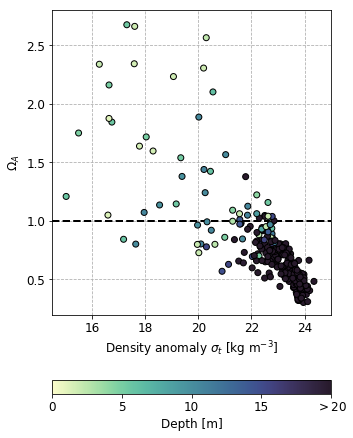

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(5, 8))
c = ax.scatter(SOG_TA['sigma'][index], co2['OmegaA'][index], c=SOG_TA['P'][index], vmin=0, vmax=20, cmap=cmocean.cm.deep, edgecolors='k', zorder=3)
ax.grid(linestyle='--', zorder=-10)
ax.plot([0, 25], [1, 1], 'k--', linewidth=2, zorder=2)
ax.set_xlim([14.5, 25])
ax.set_ylim([0.2, 2.8])
ax.set_xlabel('Density anomaly $\sigma_t$ [kg m$^{-3}$]')
ax.set_ylabel('$\Omega_A$')

cbar = fig.colorbar(c, orientation='horizontal', label='Depth [m]')
cbar.set_ticks(range(0, 21, 5))
cbar.set_ticklabels([0, 5, 10, 15, '$>$20'])
fig.savefig('/ocean/bmoorema/research/documents/presentations/LaTeX/SSEC2018/figures/ianson_data.pdf', dpi=300, bbox_inches='tight')
plt.show()